In [1]:
# This program predicts the price of Coca-Cola (KO) stock for a specific day
# using machine learning algorithms

In [2]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [3]:
start = '2020-10-02'
end = '2020-10-30'

In [4]:
# Read the data from Yahoo.finance
#data = web.DataReader('KO','yahoo',start=start, end=end)

In [5]:
# Reset the data index
#data.reset_index()

In [6]:
# Save the data to a csv file
#data.to_csv('KO.csv')

In [7]:
data = pd.read_csv('KO.csv')
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-09-30,49.619999,48.889999,49.270000,49.369999,15753700,48.985905
1,2020-10-01,49.660000,48.590000,49.439999,49.180000,17577300,48.797386
2,2020-10-02,49.580002,48.549999,48.759998,49.360001,13610100,48.975986
3,2020-10-05,49.549999,49.119999,49.430000,49.380001,10628700,48.995831
4,2020-10-06,49.730000,48.830002,49.549999,48.939999,10077400,48.559250
5,2020-10-07,49.759998,48.950001,49.020000,49.560001,10135600,49.174431
6,2020-10-08,50.540001,49.540001,49.709999,50.459999,12143900,50.067425
7,2020-10-09,51.230000,50.599998,50.669998,50.810001,11407800,50.414703
8,2020-10-12,51.529999,50.830002,50.840000,51.090000,11386500,50.692524
9,2020-10-13,50.990002,49.900002,50.990002,50.220001,14365300,49.829296


In [8]:
# Copy the original data
df = data.copy()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-09-30,49.619999,48.889999,49.270000,49.369999,15753700,48.985905
1,2020-10-01,49.660000,48.590000,49.439999,49.180000,17577300,48.797386
2,2020-10-02,49.580002,48.549999,48.759998,49.360001,13610100,48.975986
3,2020-10-05,49.549999,49.119999,49.430000,49.380001,10628700,48.995831
4,2020-10-06,49.730000,48.830002,49.549999,48.939999,10077400,48.559250
5,2020-10-07,49.759998,48.950001,49.020000,49.560001,10135600,49.174431
6,2020-10-08,50.540001,49.540001,49.709999,50.459999,12143900,50.067425
7,2020-10-09,51.230000,50.599998,50.669998,50.810001,11407800,50.414703
8,2020-10-12,51.529999,50.830002,50.840000,51.090000,11386500,50.692524
9,2020-10-13,50.990002,49.900002,50.990002,50.220001,14365300,49.829296


In [9]:
# Show and store the last row of data
actual_price = df.tail(1)
actual_price

,Date,High,Low,Open,Close,Volume,Adj Close
22,2020-10-30,48.119999,47.369999,47.810001,48.060001,15804000,47.6861


In [10]:
# Get all of the data except the last row for training
df = df.head(len(data)-1)
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-09-30,49.619999,48.889999,49.270000,49.369999,15753700,48.985905
1,2020-10-01,49.660000,48.590000,49.439999,49.180000,17577300,48.797386
2,2020-10-02,49.580002,48.549999,48.759998,49.360001,13610100,48.975986
3,2020-10-05,49.549999,49.119999,49.430000,49.380001,10628700,48.995831
4,2020-10-06,49.730000,48.830002,49.549999,48.939999,10077400,48.559250
5,2020-10-07,49.759998,48.950001,49.020000,49.560001,10135600,49.174431
6,2020-10-08,50.540001,49.540001,49.709999,50.459999,12143900,50.067425
7,2020-10-09,51.230000,50.599998,50.669998,50.810001,11407800,50.414703
8,2020-10-12,51.529999,50.830002,50.840000,51.090000,11386500,50.692524
9,2020-10-13,50.990002,49.900002,50.990002,50.220001,14365300,49.829296


In [11]:
# create empty lists
days = list()
adj_close_prices = list()

In [12]:
# get only the dats and the adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [13]:
# Show the date columns
df_days

0     2020-09-30
1     2020-10-01
2     2020-10-02
3     2020-10-05
4     2020-10-06
5     2020-10-07
6     2020-10-08
7     2020-10-09
8     2020-10-12
9     2020-10-13
10    2020-10-14
11    2020-10-15
12    2020-10-16
13    2020-10-19
14    2020-10-20
15    2020-10-21
16    2020-10-22
17    2020-10-23
18    2020-10-26
19    2020-10-27
20    2020-10-28
21    2020-10-29
Name: Date, dtype: object

In [14]:
# Show the adjust close prices
df_adj_close

0     48.985905
1     48.797386
2     48.975986
3     48.995831
4     48.559250
5     49.174431
6     50.067425
7     50.414703
8     50.692524
9     49.829296
10    49.730072
11    49.601086
12    49.640770
13    49.233959
14    49.859058
15    49.601086
16    50.285717
17    50.126961
18    49.412560
19    49.511784
20    47.586876
21    47.646408
Name: Adj Close, dtype: float64

In [15]:
# Create the indenpent data set (dates)
for i in range(len(df_days)):
    days.append([int(df['Date'].str.split('-')[i][2])])
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [16]:
days

[[30],
 [1],
 [2],
 [5],
 [6],
 [7],
 [8],
 [9],
 [12],
 [13],
 [14],
 [15],
 [16],
 [19],
 [20],
 [21],
 [22],
 [23],
 [26],
 [27],
 [28],
 [29]]

In [17]:
# Show the adjusted close price
adj_close_prices

[48.98590469360352,
 48.7973861694336,
 48.97598648071289,
 48.99583053588867,
 48.55924987792969,
 49.17443084716797,
 50.06742477416992,
 50.41470336914063,
 50.69252395629883,
 49.82929611206055,
 49.73007202148438,
 49.6010856628418,
 49.6407699584961,
 49.23395919799805,
 49.85905838012695,
 49.6010856628418,
 50.28571701049805,
 50.12696075439453,
 49.412559509277344,
 49.51178359985352,
 47.586875915527344,
 47.64640808105469]

In [18]:
# Create 3 models to make the predictions
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

D:\Users\wang\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


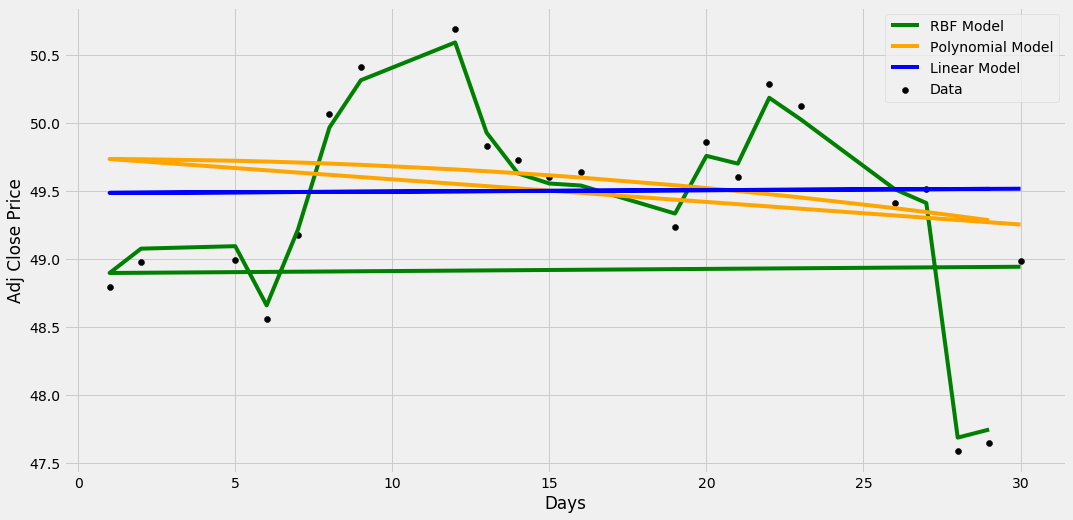

In [19]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color= 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color= 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color= 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color= 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.legend(loc='upright')
plt.show()

In [20]:
# Show the predicted price for the given day
day = [[30]]
print('The RBF SVR predicted price: ', rbf_svr.predict(day))
print('The Linear SVR predicted price: ', lin_svr.predict(day))
print('The Polynomial SVR predicted price: ', poly_svr.predict(day))

The RBF SVR predicted price:  [48.94312906]
The Linear SVR predicted price:  [49.51673182]
The Polynomial SVR predicted price:  [49.25360974]


In [21]:
# Show the actual price
print('The actual price: ', actual_price['Adj Close'][22])

The actual price:  47.68610000610352
